# Very quick presentation of Theano for neural nets

**Theano** is a compiler for mathematical expressions written in Theano. Devise any mathematical expression in the syntax of the well-established core numerics package **numpy**, and Theano will create C-code to evaluate this expression and compile it. It is also possible to generate cuda-code for GPU by simply changing a flag. Of great interest is also the fact that gradients for any scalar function can be calculated automatically, making gradient errors in the construction and training of neural networks a thing of the past.

### Structure of this notebook
- a micro-presentation of numpy
- a micro-introduction to Theano
- a logistic regression with Theano
- an XOR network with Theano
- a multi-layer perceptron with Theano

### Preamble
At the beginning of an IPython notebook, we try to do all the necessary imports

In [5]:
import numpy as np
import theano
import theano.tensor as T

%matplotlib inline
import matplotlib.pyplot as plt

Using gpu device 0: GRID K520 (CNMeM is disabled)
/home/ubuntu/venv/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Numpy

Numpy is the core numerics package in Python. It is centered around array processing exactly like matlab, and provides a very user-friendly front-end to highly optimized numerical libraries.

In [2]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [4]:
a = np.zeros(5)
a[0] = 1
a

array([ 1.,  0.,  0.,  0.,  0.])

In [6]:
a[1] = 2
a

array([ 1.,  2.,  0.,  0.,  0.])

In [7]:
a[2:4] = 5

In [8]:
a

array([ 1.,  2.,  5.,  5.,  0.])

In [9]:
a[-1] = 10

In [10]:
a

array([  1.,   2.,   5.,   5.,  10.])

In [11]:
a.shape

(5,)

In [12]:
b = np.ones([3, 4])
b

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [13]:
b.shape

(3, 4)

In [14]:
b[0]

array([ 1.,  1.,  1.,  1.])

In [15]:
b[0] = 2
b

array([[ 2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [16]:
b[:, 0]

array([ 2.,  1.,  1.])

In [17]:
b[:, 0] = 5

In [18]:
b

array([[ 5.,  2.,  2.,  2.],
       [ 5.,  1.,  1.,  1.],
       [ 5.,  1.,  1.,  1.]])

In [20]:
b[-1, -1] = 10
b

array([[  5.,   2.,   2.,   2.],
       [  5.,   1.,   1.,   1.],
       [  5.,   1.,   1.,  10.]])

In [24]:
b.ravel()

array([  5.,   2.,   2.,   2.,   5.,   1.,   1.,   1.,   5.,   1.,   1.,
        10.])

In [59]:
np.arange(30)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [60]:
np.arange(30).reshape(5, 6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

Arrays are just lots of numbers placed next to each other in memory. Numpy remembers the shape they are supposed to have and presents it to us and the algorithms as vectors or matrices or higher-dimensional arrays.

Arrays are so general, they can serve many many purposes:

#### Coordinates

In [31]:
coords = np.array([[0, 0], [1, 0], [1, 2], [0, 1], [0, 0]]).T
print(coords)

[[0 1 1 0 0]
 [0 0 2 1 0]]


[-1, 10, -1, 10]

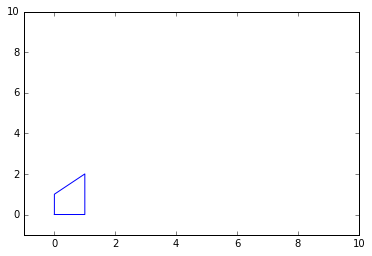

In [33]:
plt.plot(coords[0], coords[1])
plt.axis([-1, 10, -1, 10])

#### shift vectors

[-1, 10, -1, 10]

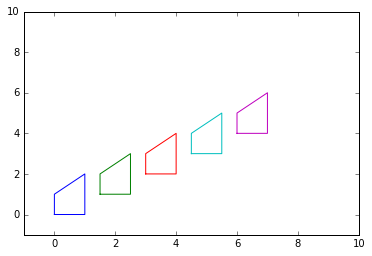

In [38]:
translation = np.array([[1.5], [1]])
for i in range(5):
    shifted = coords + translation * i
    plt.plot(shifted[0], shifted[1])
plt.axis([-1, 10, -1, 10])

#### Matrix multiplications (linear operations), such as rotations

[-1, 10, -1, 10]

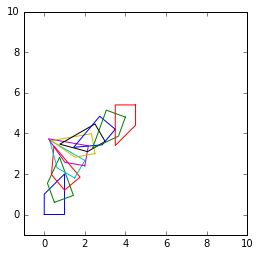

In [48]:
angle = 20. * np.pi / 180
translation = np.array([[.5], [.6]])
rot = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
rotation = np.eye(2)
for i in range(0, 10):
    rotated = rotation.dot(coords)
    shifted = rotated + i * translation
    rotation = rotation.dot(rot)
    plt.plot(shifted[0], shifted[1])

plt.axis('square')
plt.axis([-1, 10, -1, 10])

#### Images
Arrays of intensity values are the standard way of representing images

In [50]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [53]:
(digits.images[0] > 0).astype(int)

array([[0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0]])

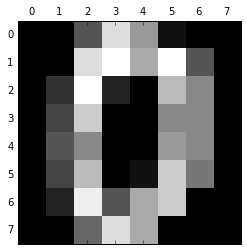

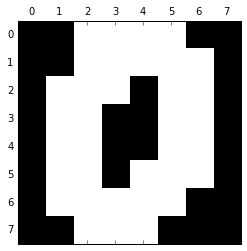

In [57]:
plt.matshow(digits.images[0])
plt.matshow(digits.images[0] > 0)
plt.gray()

### Machine Learning: Classification problems

An important subcategory of machine learning problems is the classification problem: The task is to determine which category a given sample belongs to. The range of examples for this type of problem is vast. Here we will look at the classification of digits from 0 to 9. But before that, let's take a look at an even simpler problem: 2D point clouds

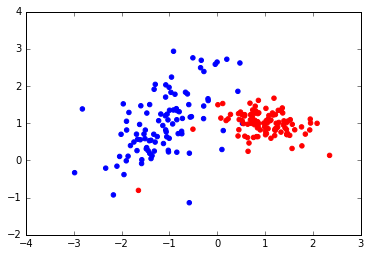

In [49]:
from sklearn import datasets
X, y = datasets.make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
plt.scatter(X[:, 0], X[:, 1], color=np.array(['r', 'b'])[y])

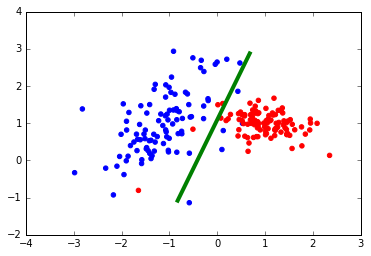

In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e5).fit(X, y)
xs = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
ys = -lr.intercept_ / lr.coef_[0, 1] - xs * lr.coef_[0, 0] / lr.coef_[0, 1]
mask = (ys > X[:, 1].min()) & (ys < X[:, 1].max())
xs, ys = xs[mask], ys[mask]
plt.scatter(X[:, 0], X[:, 1], color=np.array(['r', 'b'])[y])
plt.plot(xs, ys, 'g', lw=4)

In [71]:
# Download digits if not provided
import os, cPickle, gzip
if not os.path.exists('mnist.pkl'):
    
    if os.path.exists('mnist.pkl.gz'):
        mnist = cPickle.load(gzip.open('mnist.pkl.gz'))
    else:
        print('Downloading MNIST')
        import urllib2
        mnist_file = urllib2.urlopen("http://deeplearning.net/data/mnist/mnist.pkl.gz")
        out = open('mnist.pkl.gz', 'wb')
        out.write(mnist_file.read())
        out.close()
        mnist = cPickle.load(gzip.open('mnist.pkl.gz'))
        print('done')
else:
    mnist = cPickle.load(open(mnist.pkl))

(Xtrain, ytrain), (Xval, yval), (Xtest, ytest) = mnist

[[5 0 4 1 9 2 1 3 1 4]
 [3 5 3 6 1 7 2 8 6 9]
 [4 0 9 1 1 2 4 3 2 7]
 [3 8 6 9 0 5 6 0 7 6]
 [1 8 7 9 3 9 8 5 9 3]
 [3 0 7 4 9 8 0 9 4 1]
 [4 4 6 0 4 5 6 1 0 0]
 [1 7 1 6 3 0 2 1 1 7]
 [9 0 2 6 7 8 3 9 0 4]
 [6 7 4 6 8 0 7 8 3 1]]


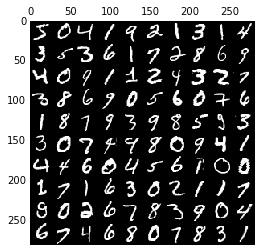

In [77]:
plt.matshow(Xtrain.reshape(-1, 28, 28)[:100].reshape(10, 10, 28, 28).transpose(0, 2, 1, 3).reshape(10 * 28, -1))
plt.gray()
print(ytrain[:100].reshape(10, 10))

## Theano

The same basic numerical entities also exist in Theano and we can use them the same way we use numpy.

In [58]:
import theano
import theano.tensor as T

In [64]:
x = T.fvector()
print x

<TensorType(float32, vector)>


$y = x^2$

In [65]:
y = x ** 2

In [66]:
y

Elemwise{pow,no_inplace}.0

$z = \frac{1}{y + 1} = \frac{1}{x^2 + 1}$

In [67]:
z = 1. / (y + 1)

In [68]:
z

Elemwise{true_div,no_inplace}.0

In [69]:
f = theano.function([x], z)

In [73]:
f(np.array([0.], dtype='float32'))

array([ 1.], dtype=float32)

In [74]:
xs = np.arange(-3., 3., .01, dtype='float32')

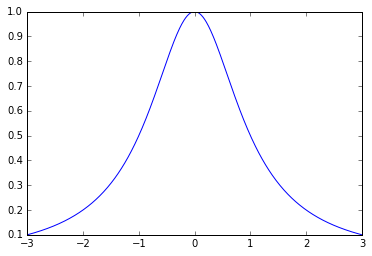

In [75]:
plt.plot(xs, f(xs))

### Logistic Regression

Logistic regression can be seen as a 1-layer neural network with zero hidden units

<img src="http://homepages.gold.ac.uk/nikolaev/perceptr.gif">

It takes the input vector $x$ and calculates a weighted sum of its elements $x_i$ with a set of weights $w_i$. After adding a constant offset $b$, it is sent through a non-linearity $\sigma(t)=\frac{1}{1 + e^{-t}}$, called a sigmoid. The formula is as follows:

$$p(x) = \sigma\left(b + \sum_{i}x_iw_i\right)$$

So let's code it:
- the input vector $x$ will be a placeholder variable as shown above
- the weights and the bias actually need to be stored somewhere, so we will use variables that can store values called *shared* variables

In [ ]:
x = T.fvector()
b = T.shared(np.zeros(1, dtype='float32'))
w = T.shared(n)